In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For compatibility across multiple platforms
import os
IB = os.environ.get('INSTABASE_URI',None) is not None
open = ib.open if IB else open

In [26]:
#penguins as a list of dictionaries
penguinsList = []
with open('penguins.csv') as p:
    rows = csv.DictReader(p)
    for r in rows:
        penguinsList.append(r)


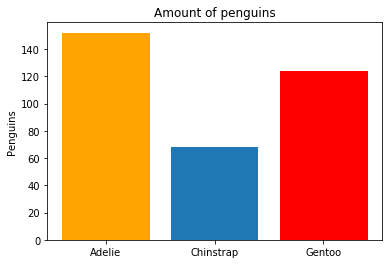

In [71]:
# number of penguins
adelie = 0
chinstrap = 0
gentoo = 0
for penguin in penguinsList:
    if penguin['species'] == "Adelie":
        adelie += 1
    elif penguin['species'] == "Chinstrap":
        chinstrap += 1
    elif penguin['species'] == "Gentoo":
        gentoo += 1
    else: continue

heights = [adelie, chinstrap, gentoo]        
total_bar = plt.bar([0, 1, 2], heights)
plt.xticks([0, 1, 2], ["Adelie", "Chinstrap", "Gentoo"])
total_bar[0].set_color("orange")
total_bar[2].set_color("red")
plt.ylabel("Penguins")
plt.title("Amount of penguins")
plt.show()

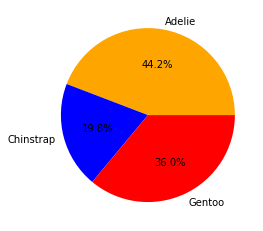

In [78]:
# number of penguins as a pie chart 

values = [adelie, chinstrap, gentoo]
lbls = ['Adelie', 'Chinstrap', 'Gentoo']
plt.pie(values, labels=lbls, colors = ['orange', 'blue', 'red'],autopct='%1.1f%%')
plt.show()

In [44]:
# data manipulation
#average weight for all species
adelie_weight = []
chinstrap_weight = []
gentoo_weight = []
for penguin in penguinsList:
    if (penguin['species'] != 'NA') and (penguin['body_mass_g'] != 'NA'):
        if penguin['species'] == "Adelie":
            adelie_weight.append(float(penguin['body_mass_g']))
        elif penguin['species'] == "Chinstrap":
            chinstrap_weight.append(float(penguin['body_mass_g']))
        else: gentoo_weight.append(float(penguin['body_mass_g']))
    else: continue
        
print("Average adelie weight:", round(np.average(adelie_weight), 3), "g")
print("Average chinstrap weight:", round(np.average(chinstrap_weight), 3), "g")
print("Average gentoo weight:", round(np.average(gentoo_weight), 3), "g")


Average adelie weight: 3700.662 g
Average chinstrap weight: 3733.088 g
Average gentoo weight: 5076.016 g


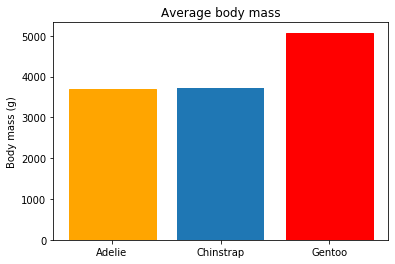

In [65]:
# bar plot of average weights -- add values to heights
labels = ['Adelie', 'Chinstrap', 'Gentoo']
heights = [round(np.average(adelie_weight), 3), round(np.average(chinstrap_weight), 3), round(np.average(gentoo_weight), 3)]

bar_chart = plt.bar([0, 1, 2], heights)
plt.xticks([0, 1, 2], labels)
bar_chart[0].set_color('orange')
bar_chart[2].set_color('red')
plt.title("Average body mass")
plt.ylabel("Body mass (g)")
plt.show()


In [ ]:
# longest and shortest flippers for all species

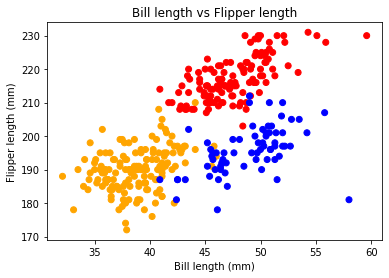

In [77]:
#scatter plot using matplotlib-- bill length vs flipper length -- add legend to plot
x = []
y = []
colors = []

for penguin in penguinsList:
    if penguin['bill_length_mm'] != 'NA' and penguin['flipper_length_mm'] != 'NA':
        x.append(float(penguin['bill_length_mm']))
        y.append(float(penguin['flipper_length_mm']))
        if penguin['species'] == "Adelie":
            colors.append("orange")
        elif penguin['species'] == "Chinstrap":
            colors.append("blue")
        else: colors.append("red")

plt.xlabel("Bill length (mm)")
plt.ylabel("Flipper length (mm)")
plt.title("Bill length vs Flipper length")
plot = plt.scatter( x, y, c = colors)
plt.show()

In [6]:
#penguins as a DATA FRAME
pen = open('penguins.csv')
penguinsDF = pd.read_csv(pen)

In [84]:
penguinsDF #when converting data from r file, I included rownumbers, which this data table already has
           #getting rid of extra column
penguinsDF = penguinsDF[['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
                         'sex', 'year']]

In [85]:
penguinsDF.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [87]:
penguinsDF[penguinsDF.species == "Adelie"]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,female,2009
148,Adelie,Dream,36.0,17.8,195.0,3450.0,female,2009
149,Adelie,Dream,37.8,18.1,193.0,3750.0,male,2009
150,Adelie,Dream,36.0,17.1,187.0,3700.0,female,2009


Text(0.5, 1.0, 'Bill length vs. Flipper length')

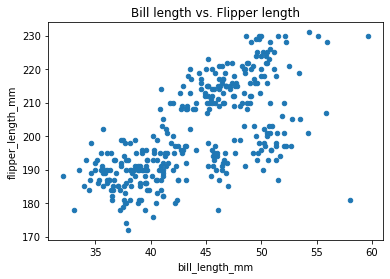

In [25]:
#scatter plot using pandas -- add a legend and add color specify different species

penguinsDF.plot.scatter(x = 'bill_length_mm', y = 'flipper_length_mm')
plt.title("Bill length vs. Flipper length")

In [ ]:
# finding max and min values
penguinsDF.groupby('species')
 
